In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.lines import Line2D
import seaborn as sns

def read_csv_files(directory):
    csv_files = []
    print(f"Checking files in directory: {directory}")
    for filename in os.listdir(directory):
        print(f"Found file: {filename}")
        if filename.startswith("sub") and filename.endswith(".csv"):
            print(f"Reading CSV file: {filename}")
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            csv_files.append(df)
        else:
            print(f"Skipping file: {filename}")
    return csv_files

def summarySE(df, measurevar, groupvars, na_rm=True):
    """Compute mean, standard error, and count of observations for each group."""
    # Group by the specified columns
    grouped = df.groupby(groupvars).agg(
        mean=(measurevar, 'mean'),
        count=(measurevar, 'size'),
        std=(measurevar, 'std')
    ).reset_index()
    
    # Calculate standard error
    grouped['se'] = grouped['std'] / np.sqrt(grouped['count'])
    
    # Remove rows with NaNs if na_rm is True
    if na_rm:
        grouped = grouped.dropna()
    
    return grouped

# Set the directory path
directory = 'data'

# Call the function and get the list of dataframes
dataframes = read_csv_files(directory)

# Display the first few rows of each DataFrame
for i, df in enumerate(dataframes):
    print(f"First few rows of DataFrame {i+1}:")
    print(df.head())
    print("\n")


Checking files in directory: data
Found file: Table_CrypticCreaturesShiftRelative_controls_YaleCohort.csv
Skipping file: Table_CrypticCreaturesShiftRelative_controls_YaleCohort.csv
Found file: CrypticCreaturesBayesianLearner_relativeID_controls.csv
Skipping file: CrypticCreaturesBayesianLearner_relativeID_controls.csv
Found file: avg_confidence_deviation_plot.png
Skipping file: avg_confidence_deviation_plot.png
Found file: CrypticCreaturesBayesianLearner_relativeShift_OCD.csv
Skipping file: CrypticCreaturesBayesianLearner_relativeShift_OCD.csv
Found file: Table_CrypticCreaturesShiftRelative_YaleCohort.csv
Skipping file: Table_CrypticCreaturesShiftRelative_YaleCohort.csv
Found file: test.csv
Skipping file: test.csv
Found file: Table_CrypticCreatures_patients_YaleCohort.csv
Skipping file: Table_CrypticCreatures_patients_YaleCohort.csv
Found file: CrypticCreaturesBayesianLearner_relativeED.csv
Skipping file: CrypticCreaturesBayesianLearner_relativeED.csv
Found file: CrypticCreaturesBayesi

In [2]:
# Set directory
os.chdir("data")

# Load data
CrypticCreatures = pd.read_csv("Table_CrypticCreatures_YaleCohort.csv")
CrypticCreature_relativeShift = pd.read_csv("Table_CrypticCreaturesShiftRelative_YaleCohort.csv")
CrypticCreatures_patients_relativeShift = pd.read_csv("Table_CrypticCreaturesShiftRelative_patients_YaleCohort.csv")
CrypticCreatures_patients_relativeShift = CrypticCreatures_patients_relativeShift.sort_values(by=['id', 'nTrial_rel'])
CrypticCreatures_controls_relativeShift = pd.read_csv("Table_CrypticCreaturesShiftRelative_controls_YaleCohort.csv")
CrypticCreatures_controls_relativeShift = CrypticCreatures_controls_relativeShift.sort_values(by=['id', 'nTrial_rel'])

CrypticCreatures_BayesianLearner = pd.read_csv("CrypticCreatures_BayesianLearner.csv")
CrypticCreatures_BayesianLearner_patients_relativeShift = pd.read_csv("CrypticCreaturesBayesianLearner_relativeShift_OCD.csv")
CrypticCreatures_BayesianLearner_patients_relativeShift = CrypticCreatures_BayesianLearner_patients_relativeShift.sort_values(by=['id', 'nTrial_rel'])
CrypticCreatures_BayesianLearner_controls_relativeShift = pd.read_csv("CrypticCreaturesBayesianLearner_relativeShift_controls.csv")
CrypticCreatures_BayesianLearner_controls_relativeShift = CrypticCreatures_BayesianLearner_controls_relativeShift.sort_values(by=['id', 'nTrial_rel'])


In [3]:
# Assuming CrypticCreatures_patients_relativeShift is a DataFrame
Cryptic_mean_acc_ID_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_accuracy_id', ['nTrial_rel'])
Cryptic_mean_acc_ED_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_accuracy_ed', ['nTrial_rel'])
Cryptic_mean_acc_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_accuracy', ['nTrial_rel'])

Cryptic_mean_conf_ID_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_confidence_id', ['nTrial_rel'])
Cryptic_mean_conf_ED_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_confidence_ed', ['nTrial_rel'])
Cryptic_mean_conf_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_confidence', ['nTrial_rel'])

#Cryptic_mean_entr_ID_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeID, 'mean_entropy_id', ['nTrial_rel'])
#Cryptic_mean_entr_ED_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeED, 'mean_entropy_ed', ['nTrial_rel'])
Cryptic_mean_entr_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'entropy', ['nTrial_rel'])
Cryptic_mean_entr_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'entropy', ['nTrial_rel'])

Cryptic_mean_sumprior_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'sum_prior_chosen_features', ['nTrial_rel'])
Cryptic_mean_sumprior_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'sum_prior_chosen_features', ['nTrial_rel'])

Cryptic_mean_BLR_confidence_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'BLR_confidence', ['nTrial_rel'])
Cryptic_mean_BLR_confidence_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'BLR_confidence', ['nTrial_rel'])

Cryptic_mean_signed_confidence_deviation_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'signed_confidence_deviation', ['nTrial_rel'])
Cryptic_mean_signed_confidence_deviation_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'signed_confidence_deviation', ['nTrial_rel'])

Cryptic_mean_signed_prior_deviation_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'signed_prior_deviation', ['nTrial_rel'])
Cryptic_mean_signed_prior_deviation_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'signed_prior_deviation', ['nTrial_rel'])


In [4]:
# Create a column for feedback type (1 for correct, 0 for incorrect)
CrypticCreatures['feedback'] = CrypticCreatures['chosen_outcome'].apply(lambda x: 1 if x == 'correct' else 0)

# Create lagged columns for feedback and confidence
CrypticCreatures['prev_feedback'] = CrypticCreatures['feedback'].shift(1)
CrypticCreatures['prev_confidence'] = CrypticCreatures['confidence'].shift(1)

# Filter out the first trial as it has no previous feedback
CrypticCreatures = CrypticCreatures.dropna(subset=['prev_feedback', 'prev_confidence'])


In [ ]:
def calculate_summary_rel(df, measurevar, groupvar):
    """
    Calculate mean, standard error, and count for a given measure variable.
    """
    summary = df.groupby(groupvar).agg(
        mean=(measurevar, 'mean'),
        count=(measurevar, 'size'),
        std=(measurevar, 'std')
    ).reset_index()
    summary['stderr'] = summary['std'] / np.sqrt(summary['count'])
    return summary

# data frames
controls_df = CrypticCreatures_controls_relativeShift
patients_df = CrypticCreatures_patients_relativeShift

# Merge controls dataset based on 'nTrial_rel' and 'id'
controls_merged_df = pd.merge(
    CrypticCreatures_BayesianLearner_controls_relativeShift,
    controls_df,
    on=['nTrial_rel', 'id'],  # Merge on both nTrial_rel and id
    how='inner'  # Use inner join to ensure matching nTrial_rel and id
)

# Merge patients dataset based on 'nTrial_rel' and 'id'
patients_merged_df = pd.merge(
    CrypticCreatures_BayesianLearner_patients_relativeShift,
    patients_df,
    on=['nTrial_rel', 'id'],  # Merge on both nTrial_rel and id
    how='inner'  # Use inner join to ensure matching nTrial_rel and id
)
# List of measure variables for controls and patients
measure_vars = [
    'change_in_mean_accuracy', 'change_in_mean_accuracy_abs', 
    'change_in_mean_accuracy_ed', 'change_in_mean_accuracy_abs_ed', 
    'change_in_mean_accuracy_id', 'change_in_mean_accuracy_abs_id',
    'change_in_mean_confidence', 'change_in_mean_confidence_abs',
    'change_in_mean_confidence_ed', 'change_in_mean_confidence_abs_ed',
    'change_in_mean_confidence_id', 'change_in_mean_confidence_abs_id',
    'signed_confidence_deviation','signed_prior_deviation','confidence','BLR_confidence',
    'chosen_outcome'
    
]

# Calculate summaries for controls and patients
summary_controls_rel = {var: calculate_summary_rel(controls_merged_df, var, 'nTrial_rel') for var in measure_vars}
summary_patients_rel = {var: calculate_summary_rel(patients_merged_df, var, 'nTrial_rel') for var in measure_vars}
# print(summary_controls_rel['confidence'])
# 
summary_controls_accuracy = summary_controls_rel['change_in_mean_accuracy']
summary_patients_accuracy = summary_patients_rel['change_in_mean_accuracy']


    nTrial_rel       mean  count        std    stderr
0           -5  77.702586     29  12.727532  2.363443
1           -4  78.472414     29  13.641411  2.533146
2           -3  79.858703     29  13.411019  2.490364
3           -2  79.990353     29  14.955570  2.777180
4           -1  79.020690     29  13.382735  2.485111
5            0  77.724138     29  12.894563  2.394460
6            1  71.333812     29  14.599896  2.711133
7            2  74.325766     29  14.301329  2.655690
8            3  77.187931     29  12.874360  2.390709
9            4  78.129310     29  12.538954  2.328425
10           5  79.711207     29  12.535096  2.327709


Shapiro-Wilk Test for Controls Accuracy: ShapiroResult(statistic=0.9916065335273743, pvalue=0.9972684979438782)
Shapiro-Wilk Test for Patients Accuracy: ShapiroResult(statistic=0.9756869077682495, pvalue=0.7203464508056641)
Levene's Test for Accuracy: LeveneResult(statistic=0.7209998198265234, pvalue=0.39943150952310014)
T-test for Accuracy: T-statistic = -0.46638548635223304, P-value = 0.6427488313980501
Shapiro-Wilk Test for Controls Confidence: ShapiroResult(statistic=0.9691125154495239, pvalue=0.5358703136444092)
Shapiro-Wilk Test for Patients Confidence: ShapiroResult(statistic=0.977249801158905, pvalue=0.7645348906517029)
Levene's Test for Confidence: LeveneResult(statistic=0.29669891966332, pvalue=0.5881220195662258)
T-test for Confidence: T-statistic = 2.907258264727379, P-value = 0.005216381952378895


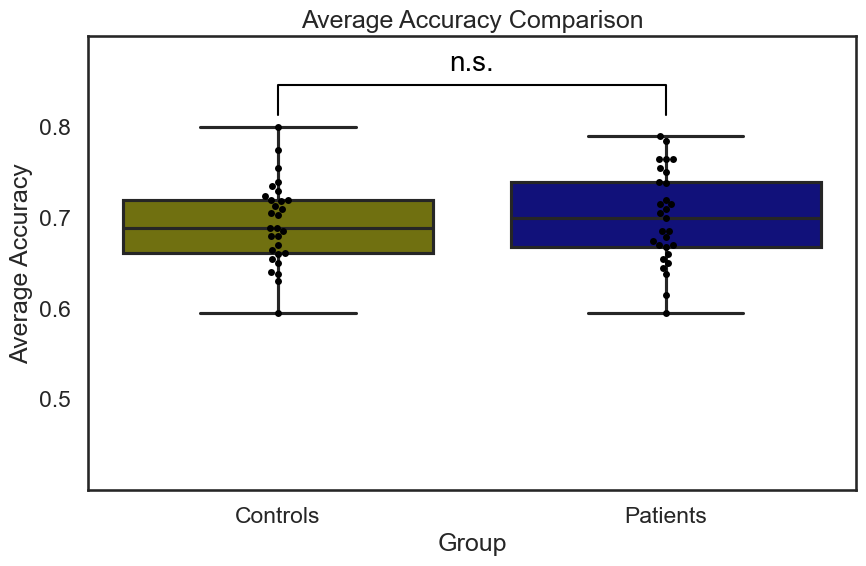

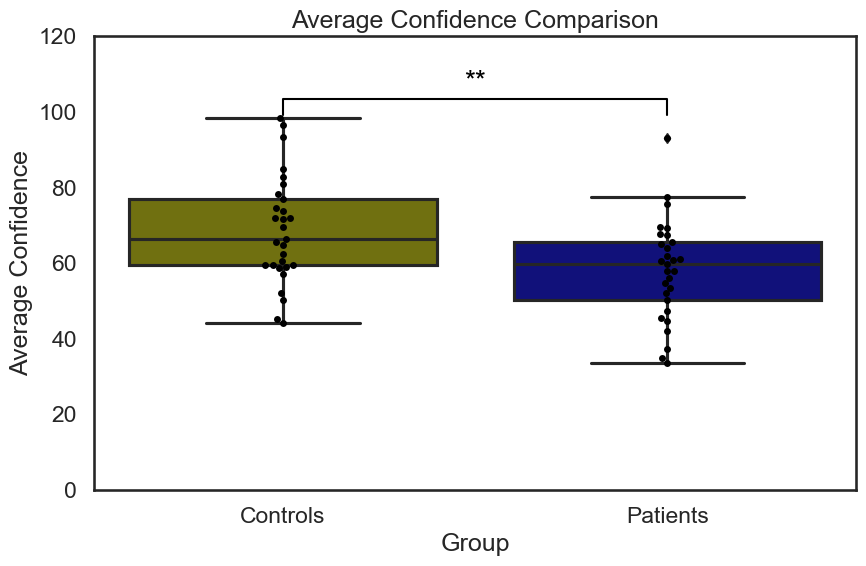

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu

# Assuming CrypticCreatures is your dataset
# CrypticCreatures = pd.read_csv('path_to_CrypticCreatures.csv')

# Compute each individual's average accuracy and confidence
CrypticCreatures['average_accuracy'] = CrypticCreatures.groupby('id')['chosen_outcome'].transform('mean')
CrypticCreatures['average_confidence'] = CrypticCreatures.groupby('id')['confidence'].transform('mean')
average_data = CrypticCreatures[['id', 'average_accuracy', 'average_confidence', 'patientstatus']].drop_duplicates()

# Separate the groups
controls_acc = average_data[average_data['patientstatus'] == 0]['average_accuracy']
patients_acc = average_data[average_data['patientstatus'] == 1]['average_accuracy']
controls_conf = average_data[average_data['patientstatus'] == 0]['average_confidence']
patients_conf = average_data[average_data['patientstatus'] == 1]['average_confidence']

# Function to perform tests and return p-value
def perform_tests(controls, patients, measure_name):
    # Check for normality
    shapiro_controls = shapiro(controls)
    shapiro_patients = shapiro(patients)
    print(f'Shapiro-Wilk Test for Controls {measure_name}: {shapiro_controls}')
    print(f'Shapiro-Wilk Test for Patients {measure_name}: {shapiro_patients}')
    
    # Check for homogeneity of variances
    levene_test = levene(controls, patients)
    print(f'Levene\'s Test for {measure_name}: {levene_test}')
    
    # Perform t-test if assumptions are met, otherwise use Mann-Whitney U test
    if shapiro_controls.pvalue > 0.05 and shapiro_patients.pvalue > 0.05 and levene_test.pvalue > 0.05:
        t_stat, p_value = ttest_ind(controls, patients)
        print(f'T-test for {measure_name}: T-statistic = {t_stat}, P-value = {p_value}')
    else:
        u_stat, p_value = mannwhitneyu(controls, patients)
        print(f'Mann-Whitney U Test for {measure_name}: U-statistic = {u_stat}, P-value = {p_value}')
    return p_value

# Perform tests and get p-values
p_value_acc = perform_tests(controls_acc, patients_acc, 'Accuracy')
p_value_conf = perform_tests(controls_conf, patients_conf, 'Confidence')

# Function to draw significance bracket
def draw_significance_bracket(ax, x1, x2, y, text, height_percent=0.02):
    height = y * height_percent
    ax.plot([x1, x1, x2, x2], [y, y + height, y + height, y], lw=1.5, color='black')
    ax.plot([x1, x1], [y, y - height], lw=1.5, color='black')  # Left vertical line
    ax.plot([x2, x2], [y, y - height], lw=1.5, color='black')  # Right vertical line
    ax.text((x1 + x2) * 0.5, y + height * 1.5, text, ha='center', va='bottom', color='black', fontsize=20)

# Determine significance text based on p-value
def get_significance_text(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'n.s.'

# Plotting function for accuracy
def plot_accuracy_boxplot(average_data, p_value_acc):
    plt.figure(figsize=(9, 6))
    ax = sns.boxplot(x='patientstatus', y='average_accuracy', data=average_data, palette={0: 'olive', 1: 'darkblue'})
    sns.swarmplot(x='patientstatus', y='average_accuracy', data=average_data, color='black', dodge=True, ax=ax, marker='o', size=5)
    
    # Add significance indication for accuracy
    max_acc = max(average_data['average_accuracy'])
    ylim = max_acc + 0.1
    significance_text = get_significance_text(p_value_acc)
    draw_significance_bracket(ax, 0, 1, ylim - 0.07, significance_text)
    
    ax.set_ylim(0.4, ylim)
    ax.set_xticklabels(['Controls', 'Patients'])
    ax.set_yticks(np.arange(0.5, 0.9, 0.1))
    ax.set_title('Average Accuracy Comparison')
    ax.set_xlabel('Group')
    ax.set_ylabel('Average Accuracy')
    plt.tight_layout()
    plt.show()

# Plotting function for confidence
def plot_confidence_boxplot(average_data, p_value_conf):
    plt.figure(figsize=(9, 6))
    ax = sns.boxplot(x='patientstatus', y='average_confidence', data=average_data, palette={0: 'olive', 1: 'darkblue'})
    sns.swarmplot(x='patientstatus', y='average_confidence', data=average_data, color='black', dodge=True, ax=ax, marker='o', size=5)
    
    # Add significance indication for confidence
    max_conf = max(average_data['average_confidence'])
    ylim = max_conf + 10
    significance_text = get_significance_text(p_value_conf)
    draw_significance_bracket(ax, 0, 1, ylim - 7, significance_text)
    
    ax.set_ylim(0, ylim)
    ax.set_xticklabels(['Controls', 'Patients'])
    ax.set_yticks(np.arange(0, 121, 20))
    ax.set_title('Average Confidence Comparison')
    ax.set_xlabel('Group')
    ax.set_ylabel('Average Confidence')
    plt.tight_layout()
    plt.show()

# Plot the boxplots separately
plot_accuracy_boxplot(average_data, p_value_acc)
plot_confidence_boxplot(average_data, p_value_conf)

In [7]:
def plot_mean_var(summary_controls, summary_patients, measurevar, title, colors):
    """
    Plot the change in mean var across shifts for controls and patients.
    """
    # Add group labels
    summary_controls['patientstatus'] = 0
    summary_patients['patientstatus'] = 1
    
    # Combine datasets
    df_combined = pd.concat([summary_controls, summary_patients], ignore_index=True)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    for group in [0, 1]:
        subset = df_combined[df_combined['patientstatus'] == group]
        
        # Plot line and scatter points
        sns.lineplot(data=subset, x='nTrial_rel', y='mean', color=colors[group])
        sns.scatterplot(data=subset, x='nTrial_rel', y='mean', color=colors[group], edgecolor=colors[group], s=100, label='Controls' if group == 0 else 'Patients')

        # Add error bars
        plt.errorbar(subset['nTrial_rel'], subset['mean'], yerr=subset['stderr'], fmt='o', color=colors[group], capsize=5)
    
    #plt.axhline(0, color='black', linewidth=1.2, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.ylim(0, 1)
    plt.title(title)
    plt.xlabel('Trial (0=Shifts)')
    plt.ylabel('Mean Accuracy')
    plt.legend(title='Group')
    plt.show()



Y-ticks: [0.  0.2 0.4 0.6 0.8 1. ]
Y-ticks: [  0  20  40  60  80 100]


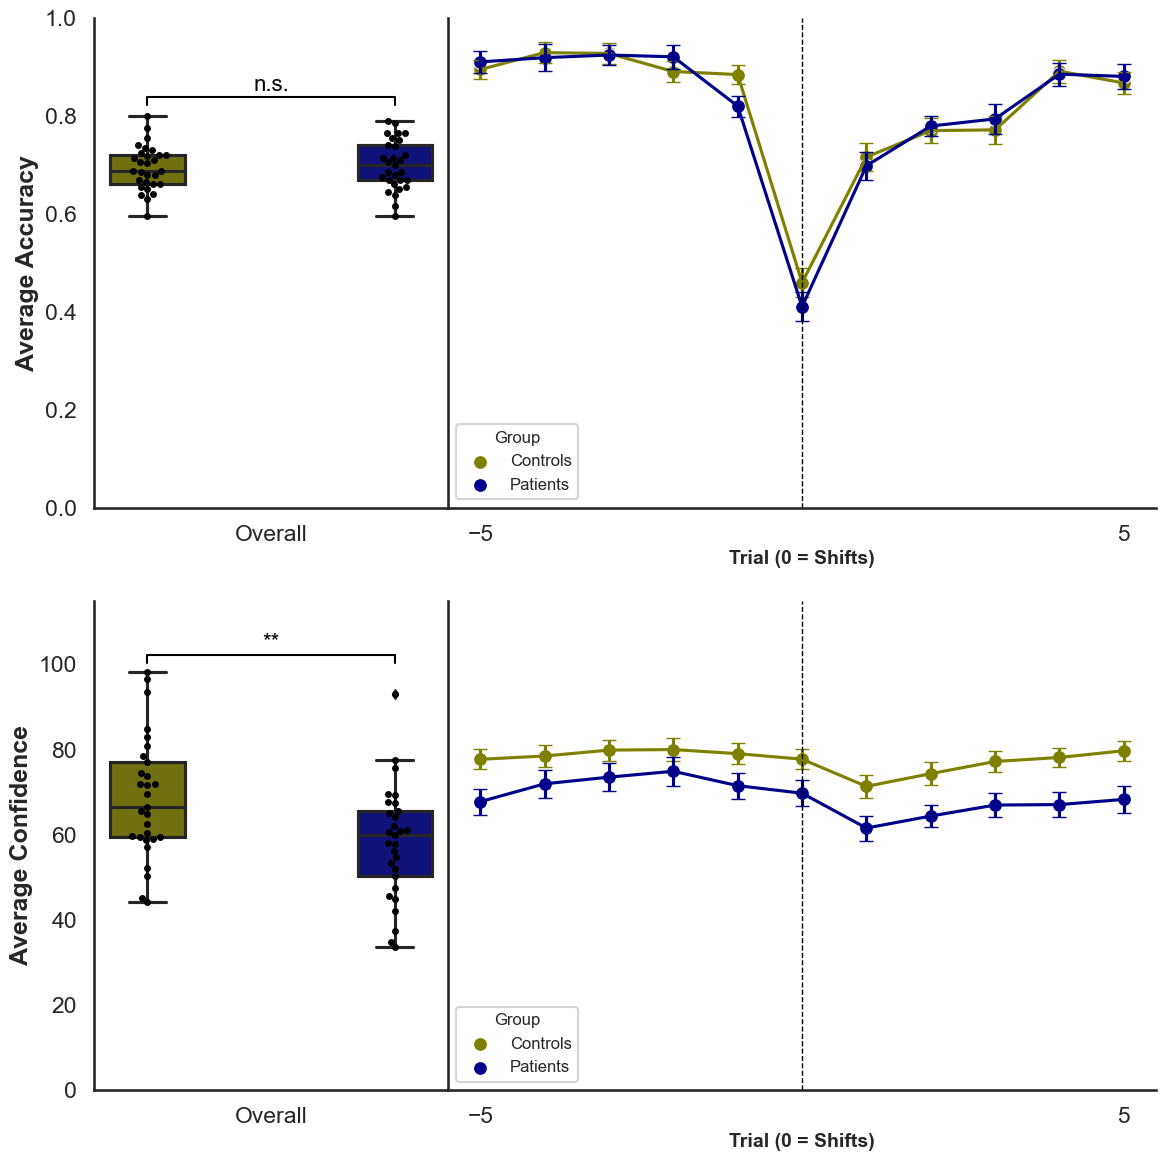

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.lines as mlines

# ============
# (1) Adapted Plot Functions that accept an axis
# ============
# Function to draw significance bracket
def draw_significance_bracket(ax, x1, x2, y, text, height_percent=0.01):
    height = y * height_percent
    ax.plot([x1, x1, x2, x2], [y, y + height, y + height, y], lw=1.5, color='black')
    ax.plot([x1, x1], [y, y - height], lw=1.5, color='black')  # Left vertical line
    ax.plot([x2, x2], [y, y - height], lw=1.5, color='black')  # Right vertical line
    ax.text((x1 + x2) * 0.5, y + height * 1.5, text, ha='center', va='bottom', color='black', fontsize=16)

# Determine significance text based on p-value
def get_significance_text(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'n.s.'
    
def plot_accuracy_boxplot_ax(ax, average_data, p_value_acc):
    """
    Plot the average accuracy boxplot (with swarm and significance bracket)
    on the provided axis.
    """
    # Plot boxplot and swarmplot:
    sns.boxplot(x='patientstatus', y='average_accuracy', data=average_data, 
                palette={0: 'olive', 1: 'darkblue'}, ax=ax, width=0.3)
    sns.swarmplot(x='patientstatus', y='average_accuracy', data=average_data, 
                  color='black', dodge=True, ax=ax, marker='o', size=5)
    
    # Calculate y-limit based on the maximum value:
    max_acc = average_data['average_accuracy'].max()
    ylim = max_acc + 0.1
    significance_text = get_significance_text(p_value_acc)
    draw_significance_bracket(ax, 0, 1, ylim - 0.07, significance_text)
    
    # Format the axis:
    ax.set_ylim(0.4, ylim)
    ax.set_xticks([0, 0.5, 1])
    # Label only the middle tick as "Overall"
    ax.set_xticklabels(['', 'Overall', ''])
    ax.set_yticks(np.arange(0.5, 0.9, 0.1))
    ax.set_xlabel(' ')
    ax.set_ylabel('Average Accuracy',fontweight='bold')
    
    # Remove the top and right spines to leave only x and y axes:
    sns.despine( )

def plot_confidence_boxplot_ax(ax, average_data, p_value_conf):
    """
    Plot the average confidence boxplot (with swarm and significance bracket)
    on the provided axis.
    """
    sns.boxplot(x='patientstatus', y='average_confidence', data=average_data, 
                palette={0: 'olive', 1: 'darkblue'}, ax=ax, width=0.3)
    sns.swarmplot(x='patientstatus', y='average_confidence', data=average_data, 
                  color='black', dodge=True, ax=ax, marker='o', size=5)
    
    max_conf = average_data['average_confidence'].max()
    ylim = max_conf + 10
    significance_text = get_significance_text(p_value_conf)
    draw_significance_bracket(ax, 0, 1, ylim - 7, significance_text)
    
    ax.set_ylim(0, ylim)
    ax.set_xticks([0, 0.5, 1])
    # Label only the middle tick as "Overall"
    ax.set_xticklabels(['', 'Overall', ''])
    ax.set_yticks(np.arange(0, 121, 20))
    ax.set_xlabel(' ')
    ax.set_ylabel('Average Confidence', fontweight='bold')
    sns.despine( )

def plot_mean_var_ax(ax, summary_controls, summary_patients, measurevar, ylabel, ylim, yticks, colors):
    """
    Plot the change in a mean measure (accuracy or confidence) across shifts for 
    controls and patients on the provided axis.
    """
    # Ensure inputs are DataFrames and add group labels:
    summary_controls = pd.DataFrame(summary_controls)
    summary_patients = pd.DataFrame(summary_patients)
    summary_controls['patientstatus'] = 'Controls'
    summary_patients['patientstatus'] = 'Patients'
    
    df_combined = pd.concat([summary_controls, summary_patients], ignore_index=True)
    
    # Plot line, scatter points, and error bars for each group:
    for group_key, color in colors.items():
        label = 'Controls' if group_key == 0 else 'Patients'
        subset = df_combined[df_combined['patientstatus'] == label]
        
        sns.lineplot(data=subset, x='nTrial_rel', y='mean', color=color, ax=ax)
        sns.scatterplot(data=subset, x='nTrial_rel', y='mean', color=color, 
                        edgecolor='white', s=100, label=label, ax=ax)
        ax.errorbar(subset['nTrial_rel'], subset['mean'], yerr=subset['stderr'], 
                    fmt='none', color=color, capsize=5)
    
    ax.axvline(0, color='black', linewidth=1, linestyle='--')
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.set_xticks((-5, 5))
    print(f"Y-ticks: {yticks}")
    ax.set_xlabel('Trial (0 = Shifts)', fontsize=14,fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=14)
    ax.legend(title='Group', fontsize=12, title_fontsize=12, loc='lower left')
    
    sns.despine( )

# ============
# (2) Create the Combined Figure
# ============

# Assuming average_data, p_value_acc, and p_value_conf are already defined.
fig, axes = plt.subplots(
    2, 2, 
    figsize=(12, 12), 
    sharey='row', 
    gridspec_kw={'width_ratios': [1, 2], 'wspace': 0}
)

plt.subplots_adjust(wspace=0)
# Plot accuracy boxplot and mean variance plot:
plot_accuracy_boxplot_ax(axes[0, 0], average_data, p_value_acc)
plot_mean_var_ax(axes[0, 1], 
                 summary_controls_rel['chosen_outcome'], 
                 summary_patients_rel['chosen_outcome'], 
                 'chosen_outcome', 'Mean Accuracy', 
                 (0, 1), np.arange(0, 1.1, 0.2), 
                 colors={0: 'olive', 1: 'darkblue'})

# Plot confidence boxplot and mean variance plot:
plot_confidence_boxplot_ax(axes[1, 0], average_data, p_value_conf)
plot_mean_var_ax(axes[1, 1], 
                 summary_controls_rel['confidence'], 
                 summary_patients_rel['confidence'], 
                 'confidence', 'Mean Confidence', 
                 (0, 115), np.arange(0, 110, 20), 
                 colors={0: 'olive', 1: 'darkblue'})



plt.tight_layout()
plt.show()


Below are plots to look at changes in variables 

In [ ]:
def plot_change_in_mean_var(summary_controls, summary_patients, measurevar, title, ydesc, colors,ylims):
    """
    Plot the change in mean var across shifts for controls and patients.
    """
    # Add group labels
    summary_controls['patientstatus'] = 0
    summary_patients['patientstatus'] = 1
    
    # Combine datasets
    df_combined = pd.concat([summary_controls, summary_patients], ignore_index=True)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    for group in [0, 1]:
        subset = df_combined[df_combined['patientstatus'] == group]
        
        # Plot line and scatter points
        sns.lineplot(data=subset, x='nTrial_rel', y='mean', color=colors[group])
        sns.scatterplot(data=subset, x='nTrial_rel', y='mean', color=colors[group], edgecolor=colors[group], s=100, label='Controls' if group == 0 else 'Patients')

        # Add error bars
        plt.errorbar(subset['nTrial_rel'], subset['mean'], yerr=subset['stderr'], fmt='o', color=colors[group], capsize=5)
    
    plt.axhline(0, color='black', linewidth=1.2, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.ylim(ylims)
    plt.title(title)
    plt.xlabel('Trial (0=Shifts)')
    plt.ylabel(ydesc)
    plt.legend(title='Group')
    plt.show()


plot_change_in_mean_var(
    summary_controls['change_in_mean_accuracy'], 
    summary_patients['change_in_mean_accuracy'], 
    'change_in_mean_accuracy', 
    ' ', 
    'Accuracy Delta',
    colors = {0: 'olive', 1: 'darkblue'},
    ylims = (-0.7, 0.4)
)


In [ ]:
#confidence 
plot_change_in_mean_var(
    summary_controls['change_in_mean_confidence'], 
    summary_patients['change_in_mean_confidence'], 
    'change_in_mean_confidence', 
    ' ',
    'Confidence Delta',
     colors = {0: '#16463F', 1: '#2D80A7'},
     ylims = (-19,6)
)
